# General EDA

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('kc_house_data.csv', index_col='id')

In [3]:
df.shape

(21613, 20)

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## Let's drop redundant columns sqft_living and lot

In [5]:
df.drop(columns= ['sqft_living15','sqft_lot15'],inplace=True)

### Drop sqft_above
as it's highly coorelated with sqft in general

In [6]:
#create new binary column for has floors 
df.drop(columns='sqft_above', inplace=True)

### Fix up date

In [7]:
df.date =df.date.apply(lambda x: x[:4]+'-'+x[4:6]+'-'+x[6:8])
df.date =pd.to_datetime(df.date)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_basement  21613 non-null  int64         
 12  yr_built       21613 non-null  int64         
 13  yr_renovated   21613 non-null  int64         
 14  zipcode        21613 non-null  int64         
 15  lat  

### Check for NaN values

In [9]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8526d7a910>,
      dtype=object)

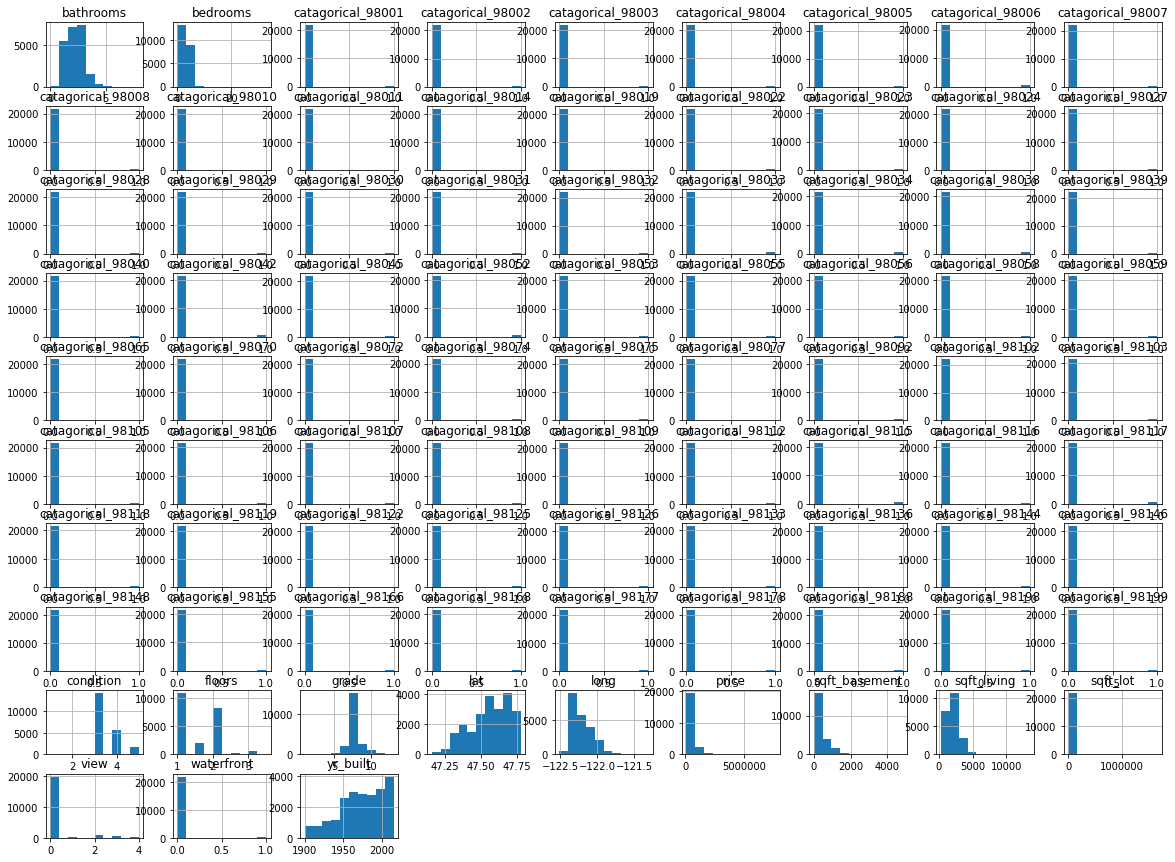

In [95]:
df.hist(bins=50, figsize=(20,15))

In [14]:
from pandas.plotting import scatter_matrix

In [18]:
attributes = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'condition', 'grade']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f855d2a4550>,
      dtype=object)

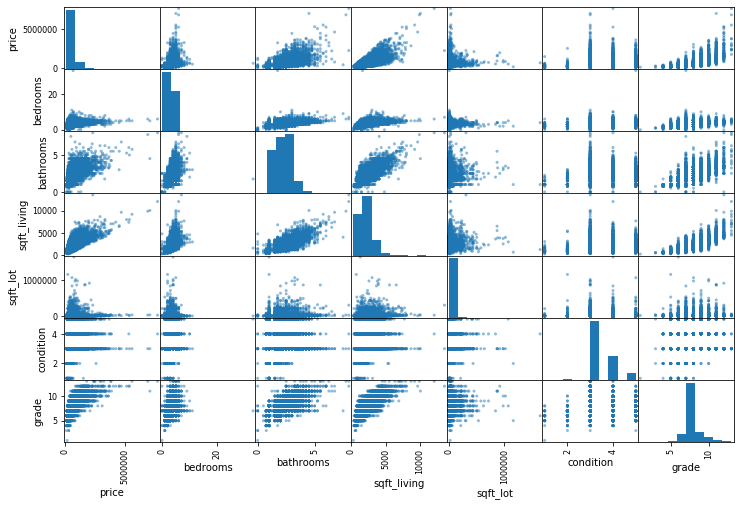

In [19]:
scatter_matrix(df[attributes], figsize=(12, 8))

#### Things to note
Odd that more bedrooms doesn't seem to scale much with price


In [15]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

## Get dummies for catagorical data

### Make catagorical var for has_basement

In [20]:
#create new binary column for has basement 
df.has_base = 0
# if the sqft_basement>0 case has_base to 1
df.has_base = df.sqft_basement.apply(lambda x: 1 if x>0 else 0)

In [21]:
df.has_base.value_counts()

0    13126
1     8487
Name: sqft_basement, dtype: int64

### Turn Zipcode into Catagorical

In [22]:
df = df.join(pd.get_dummies(df.zipcode, prefix='catagorical'))
df.drop(columns='zipcode',inplace=True)

In [23]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,catagorical_98146,catagorical_98148,catagorical_98155,catagorical_98166,catagorical_98168,catagorical_98177,catagorical_98178,catagorical_98188,catagorical_98198,catagorical_98199
id,,,,,,,,,,,,,,,,,,,,,
1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,0,0,4,...,0,0,0,1,0,0,0,0,0,0


### Let's use yr_renovated and update the 'yr_built' to the last renovation
This may give us a better sense of the style of the house in regards to age

In [18]:
# df.yr_renovated.value_counts().index
# plt.figure(figsize=(20,20))
# sns.barplot(x=df.yr_renovated.value_counts().index, y=df.yr_renovated.value_counts().values)

In [19]:
# df.yr_built.value_counts()

In [20]:
# plt.figure(figsize=(20,20))
# plt.xticks(rotation='vertical')
# sns.barplot(x=df.yr_built.value_counts().index, y=df.yr_built.value_counts().values)

In [24]:
def reno_yr(reno, built):
    if reno:
        return reno
    return built

In [25]:
#update year built to the last renovation (if there was one)
df.yr_built = df.apply(lambda x: reno_yr(x.yr_renovated, x.yr_built), axis=1)


In [26]:
df.yr_built.value_counts()

2014    650
2005    485
2006    478
2004    467
2003    457
       ... 
1901     28
1933     25
1902     25
1935     19
1934     14
Name: yr_built, Length: 116, dtype: int64

In [24]:
# plt.figure(figsize=(20,20))
# plt.xticks(rotation='vertical')
# sns.barplot(x=df.yr_built.value_counts().index, y=df.yr_built.value_counts().values)

#### Now lets drop yr_renovated 

In [27]:
df.drop(columns='yr_renovated', inplace=True)

## Look at Distributions

In [28]:
price_predictors = df.iloc[:,2:13]

In [29]:
price_predictors.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built'],
      dtype='object')

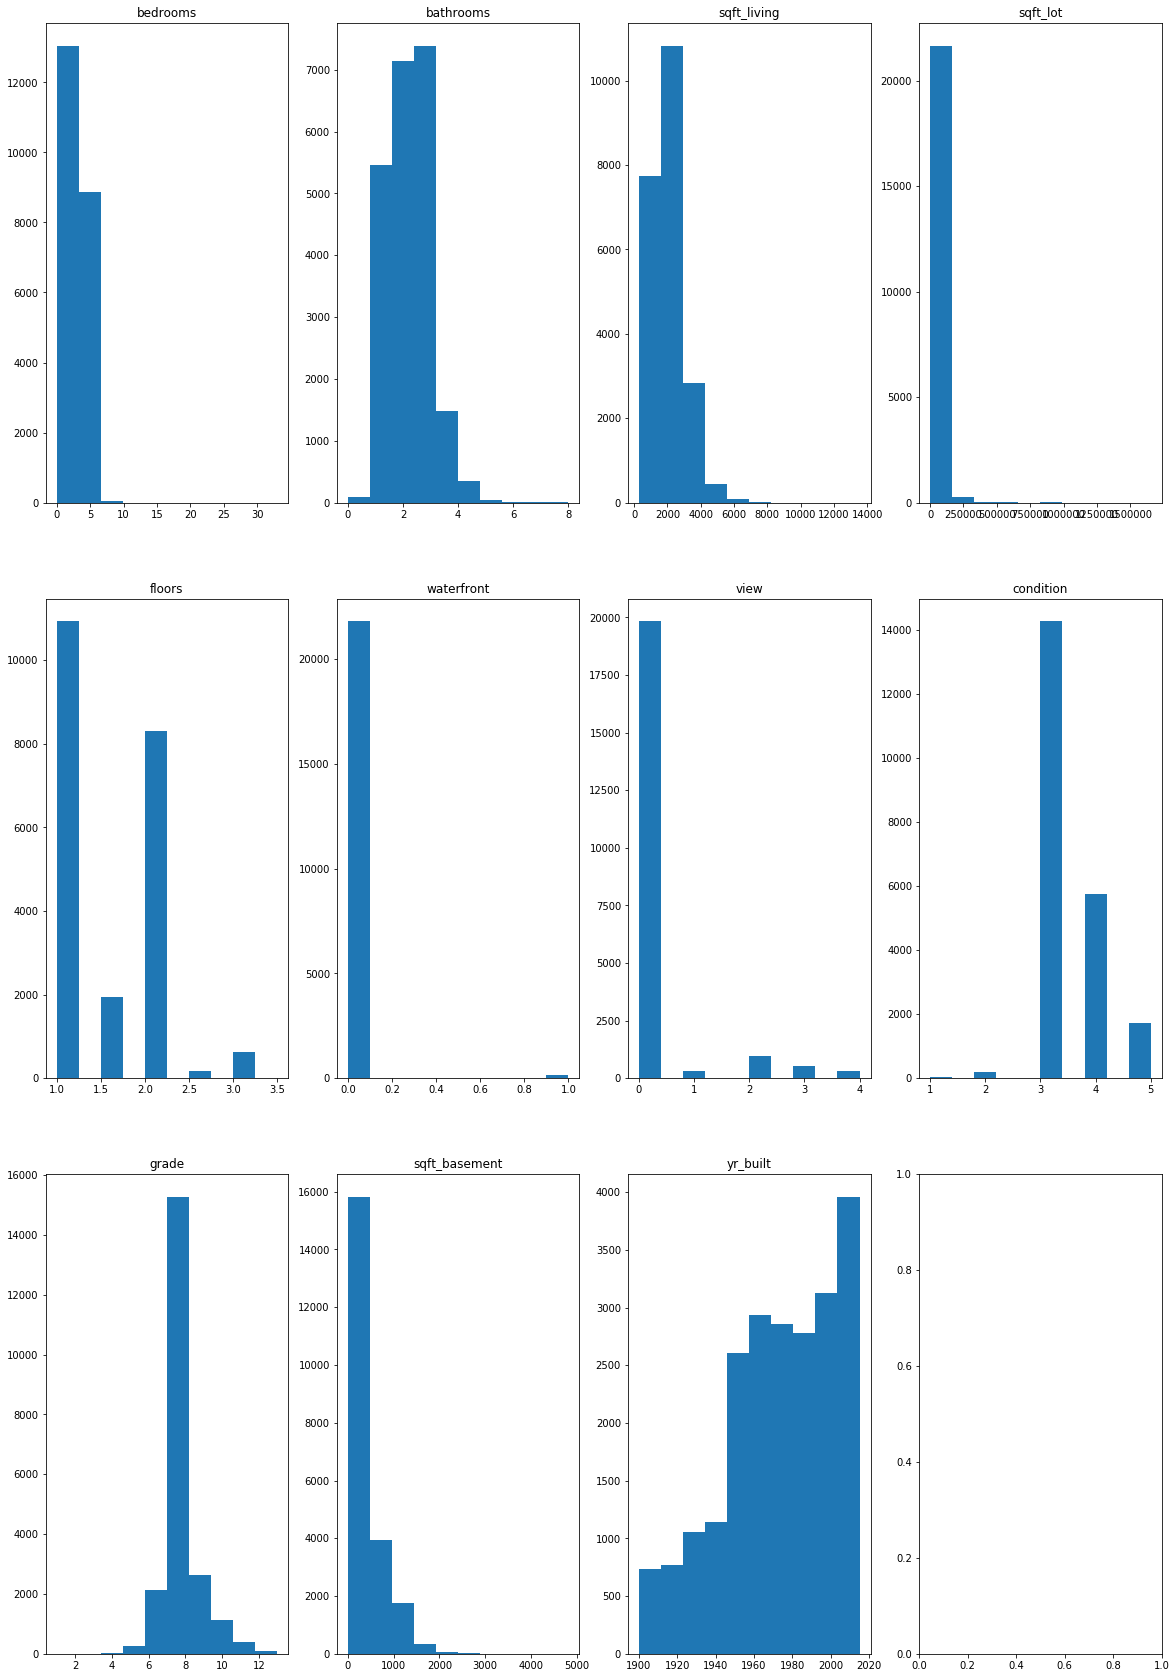

In [190]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,30))
# fig.suptitle('Graphs of Feature Distributions')
# n =1 #used for iteration below, DONT NEED IF USING np.ravel

# for row in range(3):
#     for col in range(4):
# to avoid row col nonsense  use below
list_of_subplots = np.ravel(axes)

for index,col in enumerate(price_predictors.columns):
# ax = axes[row][col]
# y = [n*xi for xi in x]
    list_of_subplots[index].hist(price_predictors[col])
    list_of_subplots[index].set_title('{}'.format(col))
fig.savefig('figures/dist_of_features')    #saves fig in current folder

## Look at correlation

In [31]:
price_predictors = df.iloc[:,2:13]
corr = price_predictors.corr()

### Function to color corr dataframe

In [37]:
# color green if above .7 coor and red if above -.7 corr
def color(val):
    if abs(val)>+.7:
        color = 'green'
        return 'color: %s' % color
    elif val<-0.7:
        color ='red'
        return 'color: %s' % color 
    else:
        color ='black'
        return 'color: %s' % color

In [38]:
price_predictors.bathrooms.value_counts()

2.50    5430
1.00    3968
1.75    3104
2.25    2079
2.00    1964
1.50    1478
2.75    1191
3.00     765
3.50     735
3.25     595
3.75     155
4.00     140
4.50     102
4.25      79
0.75      74
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
6.75       2
6.50       2
8.00       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [39]:
s = corr.style.applymap(color)
s

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built
bedrooms,1.000000,0.514159,0.575041,0.031679,0.175879,-0.006382,0.079519,0.029655,0.354189,0.303222,0.166522
bathrooms,0.514159,1.000000,0.755160,0.088924,0.502218,0.063759,0.189804,-0.119138,0.665533,0.284275,0.538495
sqft_living,0.575041,0.755160,1.000000,0.174546,0.356090,0.103648,0.286298,-0.054219,0.763293,0.436301,0.346751
sqft_lot,0.031679,0.088924,0.174546,1.000000,-0.003721,0.021667,0.074117,-0.008255,0.115752,0.015649,0.054220
floors,0.175879,0.502218,0.356090,-0.003721,1.000000,0.024137,0.031867,-0.258151,0.459584,-0.244948,0.506158
waterfront,-0.006382,0.063759,0.103648,0.021667,0.024137,1.000000,0.399552,0.016753,0.082636,0.080098,0.000085
view,0.079519,0.189804,0.286298,0.074117,0.031867,0.399552,1.000000,0.047865,0.254106,0.277867,-0.014781
condition,0.029655,-0.119138,-0.054219,-0.008255,-0.258151,0.016753,0.047865,1.000000,-0.137275,0.173494,-0.388381
grade,0.354189,0.665533,0.763293,0.115752,0.459584,0.082636,0.254106,-0.137275,1.000000,0.171130,0.463931
sqft_basement,0.303222,0.284275,0.436301,0.015649,-0.244948,0.080098,0.277867,0.173494,0.171130,1.000000,-0.099798


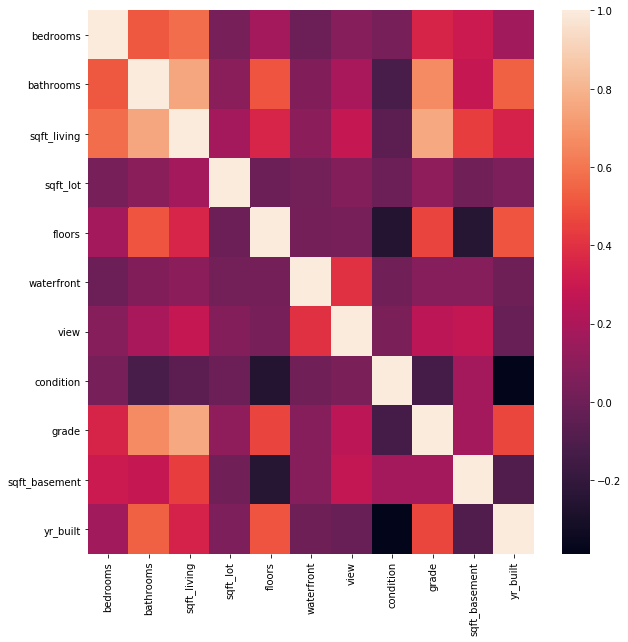

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)

## Run prliminary OLS

In [128]:
ols_features =['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built']#, 'catagorical_98001',
#        'catagorical_98002', 'catagorical_98003', 'catagorical_98004',
#        'catagorical_98005', 'catagorical_98006', 'catagorical_98007',
#        'catagorical_98008', 'catagorical_98010', 'catagorical_98011',
#        'catagorical_98014', 'catagorical_98019', 'catagorical_98022',
#        'catagorical_98023', 'catagorical_98024', 'catagorical_98027',
#        'catagorical_98028', 'catagorical_98029', 'catagorical_98030',
#        'catagorical_98031', 'catagorical_98032', 'catagorical_98033',
#        'catagorical_98034', 'catagorical_98038', 'catagorical_98039',
#        'catagorical_98040', 'catagorical_98042', 'catagorical_98045',
#        'catagorical_98052', 'catagorical_98053', 'catagorical_98055',
#        'catagorical_98056', 'catagorical_98058', 'catagorical_98059',
#        'catagorical_98065', 'catagorical_98070', 'catagorical_98072',
#        'catagorical_98074', 'catagorical_98075', 'catagorical_98077',
#        'catagorical_98092', 'catagorical_98102', 'catagorical_98103',
#        'catagorical_98105', 'catagorical_98106', 'catagorical_98107',
#        'catagorical_98108', 'catagorical_98109', 'catagorical_98112',
#        'catagorical_98115', 'catagorical_98116', 'catagorical_98117',
#        'catagorical_98118', 'catagorical_98119', 'catagorical_98122',
#        'catagorical_98125', 'catagorical_98126', 'catagorical_98133',
#        'catagorical_98136', 'catagorical_98144', 'catagorical_98146',
#        'catagorical_98148', 'catagorical_98155', 'catagorical_98166',
#        'catagorical_98168', 'catagorical_98177', 'catagorical_98178',
#        'catagorical_98188', 'catagorical_98198', 'catagorical_98199']

In [129]:
for i in ols_features:
    print(df[i].value_counts())


3     10012
4      6948
2      2808
5      1631
6       286
1       209
7        38
8        13
0        13
9         6
10        3
11        1
33        1
Name: bedrooms, dtype: int64
2.50    5430
1.00    3968
1.75    3104
2.25    2079
2.00    1964
1.50    1478
2.75    1191
3.00     765
3.50     735
3.25     595
3.75     155
4.00     140
4.50     102
4.25      79
0.75      74
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
6.75       2
6.50       2
8.00       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
1300    142
1400    141
1010    139
1440    133
1800    131
       ... 
3001      1
4970      1
2905      1
2793      1
1975      1
Name: sqft_living, Length: 1038, dtype: int64
5000     364
6000     298
4000     255
7200     224
4800     124
        ... 
10946      1
8899       1
6852       1
9976       1
36862      1
Name: sqft_lot, Length: 9782, dtype: int64
1.0    10924
2.0     8305
1.5  

I'm removing lat and long since we already have a view and zipcode column
This will reduce multicolinearity 

In [130]:
ols_formula ='price~'+'+'.join(ols_features)

In [131]:
simple_reg = ols(formula=ols_formula,data=df).fit()
simple_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3520.
Date:                Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:21:30   Log-Likelihood:            -3.0146e+05
No. Observations:               21969   AIC:                         6.029e+05
Df Residuals:                   21957   BIC:                         6.030e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.436e+06   1.39e+05     39.012      0.000    5.16e+06    5.71e+06
bedrooms      -3.823e+04   2042.302    -18.720      0.000   -4.22e+04   -3.42e+04
bathrooms      3.965e+04   3531.497     11.228      0.000    3.27e+04    4.66e+04
sqft_living     173.3879      3.543     48.944      0.000     166.444     180.332
sqft_lot         -0.2679      0.037     -7.200      0.000      -0.341      -0.195
floors         2.293e+04   3792.993      6.045      0.000    1.55e+04    3.04e+04
waterfront     5.922e+05   1.89e+04     31.254      0.000    5.55e+05    6.29e+05
view           5.061e+04   2276.173     22.233      0.000    4.61e+04    5.51e+04
condition      1.738e+04   2519.828      6.899      0.000    1.24e+04    2.23e+04
grade          1.191e+05   2181.138     54.621      0.000    1.15e+05    1.23e+05
sqft_basement    10.7503      4.498      2.390      0.017       1.934      19.567
yr_built      -3158.1739     71.360    -44.257      0.000   -3298.044   -3018.304
==============================================================================
Omnibus:                    16384.205   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1122152.890
Skew:                           2.989   Prob(JB):                         0.00
Kurtosis:                      37.499   Cond. No.                     4.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Make all this with train test split

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(df[ols_features], df['price'], test_size=0.33, random_state=42)

### Standardize and Scale the predictor variables
Calling .fit() give us the mean and standard deviation constants to use on all future samples for this dataset

In [134]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [135]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built
id,,,,,,,,,,,
9834200925,3,2.25,1340,4080,1.5,0,0,3,6,170,1907
3955800080,5,1.50,1890,10880,1.0,0,0,3,7,0,1962
724069023,1,1.25,1810,5070,1.5,1,4,4,8,580,1967
7691800020,4,2.50,2510,4543,2.0,0,0,3,8,0,2002
5469000140,4,1.75,1590,7920,2.0,0,0,4,7,0,1960
...,...,...,...,...,...,...,...,...,...,...,...
4193500140,3,1.75,1800,8000,1.0,0,0,3,8,0,1972
9541600350,3,2.25,2240,8800,1.0,0,0,5,8,0,1957
2068000270,5,3.00,3850,14990,1.0,0,0,4,9,1560,1964


In [136]:
y_train

id
9834200925     330000.0
3955800080     420000.0
724069023     1247000.0
7691800020     660000.0
5469000140     373000.0
                ...    
4193500140     665000.0
9541600350     831000.0
2068000270    1400000.0
381000110      599950.0
7137950460     272000.0
Name: price, Length: 14719, dtype: float64

In [137]:
pd.concat([X_train, y_train], axis=1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,price
id,,,,,,,,,,,,
9834200925,3,2.25,1340,4080,1.5,0,0,3,6,170,1907,330000.0
3955800080,5,1.50,1890,10880,1.0,0,0,3,7,0,1962,420000.0
724069023,1,1.25,1810,5070,1.5,1,4,4,8,580,1967,1247000.0
7691800020,4,2.50,2510,4543,2.0,0,0,3,8,0,2002,660000.0
5469000140,4,1.75,1590,7920,2.0,0,0,4,7,0,1960,373000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4193500140,3,1.75,1800,8000,1.0,0,0,3,8,0,1972,665000.0
9541600350,3,2.25,2240,8800,1.0,0,0,5,8,0,1957,831000.0
2068000270,5,3.00,3850,14990,1.0,0,0,4,9,1560,1964,1400000.0


### Now we will transform X_train dataset
and the X_test dataset for later

In [138]:
X_trained_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
X_trained_scaled.shape

(14719, 11)

In [140]:
simple_reg = ols(formula=ols_formula,data=pd.concat([X_train, y_train], axis=1)).fit()
simple_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2431.
Date:                Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:22:05   Log-Likelihood:            -2.0210e+05
No. Observations:               14719   AIC:                         4.042e+05
Df Residuals:                   14707   BIC:                         4.043e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.492e+06   1.73e+05     31.825      0.000    5.15e+06    5.83e+06
bedrooms      -3.516e+04   2462.419    -14.278      0.000      -4e+04   -3.03e+04
bathrooms      3.899e+04   4342.833      8.978      0.000    3.05e+04    4.75e+04
sqft_living     166.4709      4.329     38.459      0.000     157.986     174.955
sqft_lot         -0.2443      0.044     -5.560      0.000      -0.330      -0.158
floors         2.201e+04   4650.185      4.733      0.000    1.29e+04    3.11e+04
waterfront     6.564e+05    2.3e+04     28.491      0.000    6.11e+05    7.02e+05
view           4.969e+04   2796.255     17.770      0.000    4.42e+04    5.52e+04
condition       1.81e+04   3112.292      5.815      0.000     1.2e+04    2.42e+04
grade          1.265e+05   2669.492     47.371      0.000    1.21e+05    1.32e+05
sqft_basement    15.2937      5.534      2.763      0.006       4.446      26.142
yr_built      -3213.1719     88.333    -36.376      0.000   -3386.316   -3040.028
==============================================================================
Omnibus:                    10808.915   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           742451.697
Skew:                           2.908   Prob(JB):                         0.00
Kurtosis:                      37.304   Cond. No.                     4.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Now run using scikitlearn regression

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [172]:
reg = LinearRegression().fit(X_trained_scaled, y_train)

In [173]:
reg.intercept_

541331.2243358921

In [174]:
reg.coef_

array([-33180.40837781,  30049.66911905, 153761.49960642, -10512.65011073,
        11875.97762953,  57291.54630135,  38250.80784482,  11816.43197662,
       149638.79961601,   6822.89247667, -92634.84628924])

In [175]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built'],
      dtype='object')

### Visualize feature importance

In [185]:
df_

,0
bedrooms,-33180.408378
bathrooms,30049.669119
sqft_living,153761.499606
sqft_lot,-10512.650111
floors,11875.977630
waterfront,57291.546301
view,38250.807845
condition,11816.431977
grade,149638.799616
sqft_basement,6822.892477


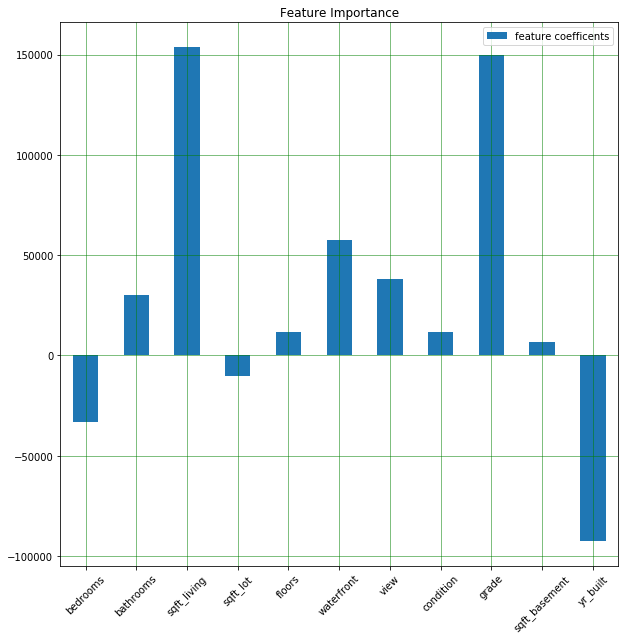

In [189]:
df_ = pd.DataFrame(reg.coef_, X_train.columns)
df_.rename(columns={0: "feature coefficents"}, inplace=True)
ax = df_.plot.bar(figsize=(10,10),rot='feature importance')
plt.title('Feature Importance')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
fig.savefig('figures/feature-importance') 

Excluding zipecode, the most important features are

sqft_living, grade, and yr_built

### Check fit on training data

In [145]:
y_train_predict= reg.predict(X_trained_scaled)

In [146]:
mean_squared_error(y_train_predict, y_train)

49370823894.8227

In [147]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))


Mean Absolute Error: 143748.9532233487
Mean Squared Error: 49370823894.8227
Root Mean Squared Error: 222195.46326336797


### Check fit on testing data

In [148]:
y_test_predict= reg.predict(X_test_scaled)

In [149]:
mean_squared_error(y_test_predict, y_test)

47145778784.36161

In [150]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))


Mean Absolute Error: 142026.842655217
Mean Squared Error: 47145778784.36161
Root Mean Squared Error: 217130.7872789154


In [153]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predict})

In [154]:
df2 = df1.head(25)

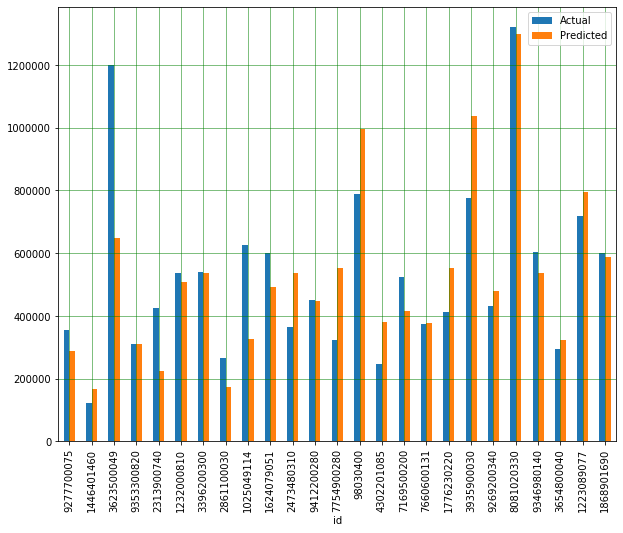

In [155]:
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### R^2 Score for training and testing set

In [151]:
#training score
reg.score(X_trained_scaled, y_train)

0.6452024466652508

In [152]:
#testing score
reg.score(X_test_scaled, y_test)

0.6203657332928147

The scoring similarity between testing and training makes me think the model is NOT overfit and performs well on testing data.

However, our dataframe may be a non randomly sampled subset of houses

### Now lets look at the biggest errors and why they may happen